In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import argparse
from influxdb import InfluxDBClient
from mpl_toolkits.mplot3d import Axes3D

After import all the library, we need to import the data into dataset

In [4]:
def read_data():
    with open('/Users/sherry/Downloads/InfluxPyproject-master/population.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[1:]]
def read_header():
    with open('/Users/sherry/Downloads/InfluxPyproject-master/population.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[:1]]
def main(host='localhost', port=8086):       #input your port number which has been set for influx
    """Instantiate the connection to the InfluxDB client."""
    user = 'admin'
    password = 'admin'
    dbname = 'population'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    
    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create DataFrame");
    b=read_header();
    arr = np.array([b]);
    print(arr)
    narr=np.delete(arr,0) # remove the date column
    print(narr)
    length=len(narr);
    print(narr); # getting /n (new line?,why?)
    narr[length-1]=narr[length-1].replace("\n",""); 
    print(narr); #removed /n
    a=read_data()
    print(narr); #removed /n
    print("Create database: " + dbname)
    client.create_database(dbname)
    j=0;
    for i in range(len(narr)):
        j=j+1;
        date=1960
        for metric in a:
            metric[j]=metric[j].replace("\n",""); # same as line 31
            narr[i]
            print(narr[i],metric[j],str(date)+"-12-31"+"T00:00:00Z")
            influx_metric = [{
                'measurement': 'population', #name of the table 
                'tags': {
                    'items': narr[i]#name of column
                },
                'time': str(date)+"-12-31"+"T00:00:00Z",
                'fields': {
                    'value': metric[j] #value of field
                }
            }]
            client.write_points(influx_metric)
            date=date+1;

main()


Create DataFrame
[[['\ufeffyear' 'Population' 'Population growth'
   'Births attended by skilled health staff' 'period of time\n']]]
['Population' 'Population growth' 'Births attended by skilled health staff'
 'period of time\n']
['Population' 'Population growth' 'Births attended by skilled health staff'
 'period of time\n']
['Population' 'Population growth' 'Births attended by skilled health staff'
 'period of time']
['Population' 'Population growth' 'Births attended by skilled health staff'
 'period of time']
Create database: population
Population 180671000 1960-12-31T00:00:00Z
Population 183691000 1961-12-31T00:00:00Z
Population 186538000 1962-12-31T00:00:00Z
Population 189242000 1963-12-31T00:00:00Z
Population 191889000 1964-12-31T00:00:00Z
Population 194303000 1965-12-31T00:00:00Z
Population 196560000 1966-12-31T00:00:00Z
Population 198712000 1967-12-31T00:00:00Z
Population 200706000 1968-12-31T00:00:00Z
Population 202677000 1969-12-31T00:00:00Z
Population 205052000 1970-12-31T00:

In [6]:
population = pd.read_csv('/Users/sherry/Downloads/InfluxPyproject-master/population.csv')
population

,year,Population,Population growth,Births attended by skilled health staff,period of time
0,1960,180671000,1.701993,0.0,a
1,1961,183691000,1.657730,0.0,a
2,1962,186538000,1.537997,0.0,a
3,1963,189242000,1.439165,0.0,a
4,1964,191889000,1.389046,0.0,a
5,1965,194303000,1.250172,0.0,a
6,1966,196560000,1.154893,0.0,a
7,1967,198712000,1.088881,0.0,a
8,1968,200706000,0.998461,0.0,a
9,1969,202677000,0.977243,0.0,a


in this part I use a to f to distinguished the year into 6 decades. In this way, we can see how the varibles will influence the value. Is this dataset have pattern when we merge the data into 6 decades? 

## Correlation matrix plotting function:

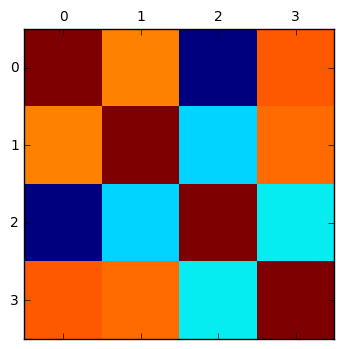

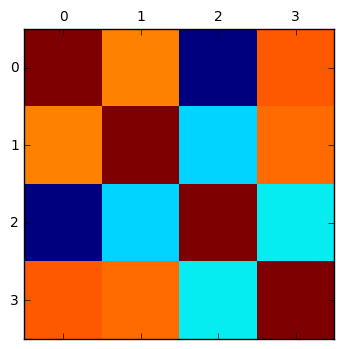

In [76]:
import seaborn as sns
plt.matshow(population.corr())
plt.show()

After load the database, we need to standarlized the data. PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
features = ['Population', 'Population growth', 'Births attended by skilled health staff']
#these names are without the target name, target column is what we need to predict
x = population.loc[:, features].values
y = population.loc[:,['period of time']].values
x = StandardScaler().fit_transform(x)

#In this way, x is standardlized

In [45]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

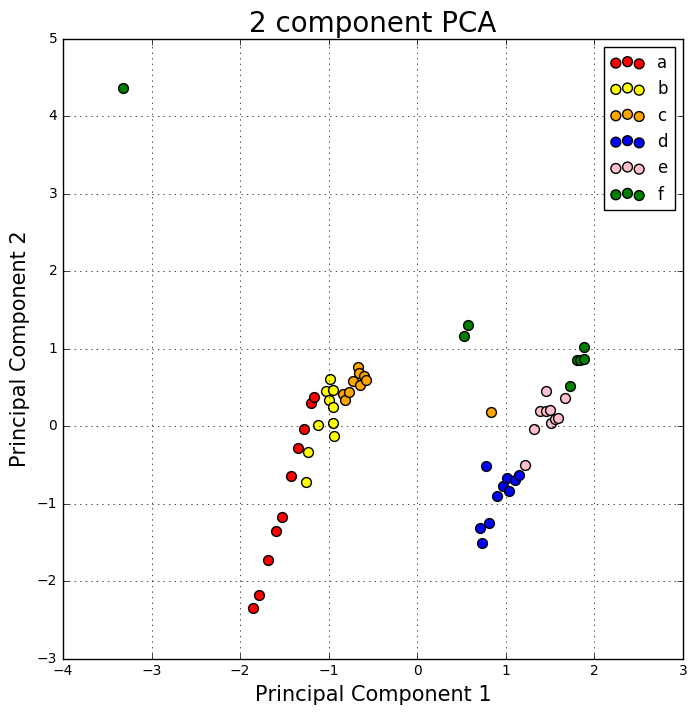

In [55]:
finalDf = pd.concat([principalDf, population[['period of time']]], axis = 1)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a', 'b', 'c','d','e','f']
colors =  ['red', 'yellow', 'orange','blue','pink','green','grey']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['period of time'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In this test, we do a 2 dimensional pca and devide the years into decades, the X ray is for principal component 1(the most important pca), and y for principle components 2(the second most important pca). while we did it we can find the patterns that in the same decades, There is a perfect contrast between 1960-1990 and 1990-2017, the - means after standlized, the pca is - means it have negative influence, and + means postive influence. 

In [9]:
def read_data():
    with open('/Users/sherry/Downloads/InfluxPyproject-master/society.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[1:]]
def read_header():
    with open('/Users/sherry/Downloads/InfluxPyproject-master/society.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[:1]]
def main(host='localhost', port=8086):       #input your port number which has been set for influx
    """Instantiate the connection to the InfluxDB client."""
    user = 'admin'
    password = 'admin'
    dbname = 'society'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    
    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create DataFrame");
    b=read_header();
    arr = np.array([b]);
    print(arr)
    narr=np.delete(arr,0) # remove the date column
    print(narr)
    length=len(narr);
    print(narr); # getting /n (new line?,why?)
    narr[length-1]=narr[length-1].replace("\n",""); 
    print(narr); #removed /n
    a=read_data()
    print(narr); #removed /n
    print("Create database: " + dbname)
    client.create_database(dbname)
    j=0;
    for i in range(len(narr)):
        j=j+1;
        date=1960
        for metric in a:
            metric[j]=metric[j].replace("\n",""); # same as line 31
            narr[i]
            print(narr[i],metric[j],str(date)+"-12-31"+"T00:00:00Z")
            influx_metric = [{
                'measurement': 'population', #name of the table 
                'tags': {
                    'items': narr[i]#name of column
                },
                'time': str(date)+"-12-31"+"T00:00:00Z",
                'fields': {
                    'value': metric[j] #value of field
                }
            }]
            client.write_points(influx_metric)
            date=date+1;

main()



Create DataFrame
[[['\ufeffyear' 'GNI per capita_Atlas method' 'GNI per capita_PPP'
   'Life expectancy at birth_total' 'Fertility rate_total '
   'Adolescent fertility rate ' 'Contraceptive prevalence_ any methods'
   'Immunization_measles ' 'School enrollment_secondary '
   'School enrollment_primary and secondary\n']]]
['GNI per capita_Atlas method' 'GNI per capita_PPP'
 'Life expectancy at birth_total' 'Fertility rate_total '
 'Adolescent fertility rate ' 'Contraceptive prevalence_ any methods'
 'Immunization_measles ' 'School enrollment_secondary '
 'School enrollment_primary and secondary\n']
['GNI per capita_Atlas method' 'GNI per capita_PPP'
 'Life expectancy at birth_total' 'Fertility rate_total '
 'Adolescent fertility rate ' 'Contraceptive prevalence_ any methods'
 'Immunization_measles ' 'School enrollment_secondary '
 'School enrollment_primary and secondary\n']
['GNI per capita_Atlas method' 'GNI per capita_PPP'
 'Life expectancy at birth_total' 'Fertility rate_total '
 '

In [10]:
society = pd.read_csv('/Users/sherry/Downloads/InfluxPyproject-master/society.csv')
society

,year,GNI per capita_Atlas method,GNI per capita_PPP,Life expectancy at birth_total,Fertility rate_total,Adolescent fertility rate,Contraceptive prevalence_ any methods,Immunization_measles,School enrollment_secondary,School enrollment_primary and secondary
0,1960,0,0,69.770732,3.6540,84.9872,0.0,0,0.000000,0.00000
1,1961,0,0,70.270732,3.6200,82.7346,0.0,0,0.000000,0.00000
2,1962,3280,0,70.119512,3.4610,80.4820,0.0,0,0.000000,0.00000
3,1963,3410,0,69.917073,3.3190,77.9506,0.0,0,0.000000,0.00000
4,1964,3610,0,70.165854,3.1900,75.4192,0.0,0,0.000000,0.00000
5,1965,3880,0,70.214634,2.9130,72.8878,0.0,0,0.000000,0.00000
6,1966,4190,0,70.212195,2.7210,70.3564,0.0,0,0.000000,0.00000
7,1967,4370,0,70.560976,2.5580,67.8250,0.0,0,0.000000,0.00000
8,1968,4740,0,69.951220,2.4640,66.4660,0.0,0,0.000000,0.00000
9,1969,5070,0,70.507317,2.4560,65.1070,0.0,0,0.000000,0.00000


In [11]:
def read_data():
    with open('/Users/sherry/Downloads/InfluxPyproject-master/internet.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[1:]]
def read_header():
    with open('/Users/sherry/Downloads/InfluxPyproject-master/internet.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[:1]]
def main(host='localhost', port=8086):       #input your port number which has been set for influx
    """Instantiate the connection to the InfluxDB client."""
    user = 'admin'
    password = 'admin'
    dbname = 'internet'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    
    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create DataFrame");
    b=read_header();
    arr = np.array([b]);
    print(arr)
    narr=np.delete(arr,0) # remove the date column
    print(narr)
    length=len(narr);
    print(narr); # getting /n (new line?,why?)
    narr[length-1]=narr[length-1].replace("\n",""); 
    print(narr); #removed /n
    a=read_data()
    print(narr); #removed /n
    print("Create database: " + dbname)
    client.create_database(dbname)
    j=0;
    for i in range(len(narr)):
        j=j+1;
        date=1990
        for metric in a:
            metric[j]=metric[j].replace("\n",""); # same as line 31
            narr[i]
            print(narr[i],metric[j],str(date)+"-12-31"+"T00:00:00Z")
            influx_metric = [{
                'measurement': 'population', #name of the table 
                'tags': {
                    'items': narr[i]#name of column
                },
                'time': str(date)+"-12-31"+"T00:00:00Z",
                'fields': {
                    'value': metric[j] #value of field
                }
            }]
            client.write_points(influx_metric)
            date=date+1;

main()



Create DataFrame
[[['\ufeffyear' 'percentage\n']]]
['percentage\n']
['percentage\n']
['percentage']
['percentage']
Create database: internet
percentage 0.784728502 1990-12-31T00:00:00Z
percentage 1.163193726 1991-12-31T00:00:00Z
percentage 1.724202539 1992-12-31T00:00:00Z
percentage 2.271673294 1993-12-31T00:00:00Z
percentage 4.862780635 1994-12-31T00:00:00Z
percentage 9.237088297 1995-12-31T00:00:00Z
percentage 16.41935296 1996-12-31T00:00:00Z
percentage 21.61640097 1997-12-31T00:00:00Z
percentage 30.09319659 1998-12-31T00:00:00Z
percentage 35.84872446 1999-12-31T00:00:00Z
percentage 43.07916264 2000-12-31T00:00:00Z
percentage 49.08083159 2001-12-31T00:00:00Z
percentage 58.78540388 2002-12-31T00:00:00Z
percentage 61.69711712 2003-12-31T00:00:00Z
percentage 64.75825648 2004-12-31T00:00:00Z
percentage 67.96805292 2005-12-31T00:00:00Z
percentage 68.93119327 2006-12-31T00:00:00Z
percentage 75 2007-12-31T00:00:00Z
percentage 74 2008-12-31T00:00:00Z
percentage 71 2009-12-31T00:00:00Z
percen

In [12]:
internet = pd.read_csv('/Users/sherry/Downloads/InfluxPyproject-master/internet.csv')
internet

,year,percentage
0,1990,0.784729
1,1991,1.163194
2,1992,1.724203
3,1993,2.271673
4,1994,4.862781
5,1995,9.237088
6,1996,16.419353
7,1997,21.616401
8,1998,30.093197
9,1999,35.848724


In [14]:
def read_data():
    with open('/Users/sherry/Downloads/InfluxPyproject-master/energy.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[1:]]
def read_header():
    with open('/Users/sherry/Downloads/InfluxPyproject-master/energy.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[:1]]
def main(host='localhost', port=8086):       #input your port number which has been set for influx
    """Instantiate the connection to the InfluxDB client."""
    user = 'admin'
    password = 'admin'
    dbname = 'energy'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'
    
    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create DataFrame");
    b=read_header();
    arr = np.array([b]);
    print(arr)
    narr=np.delete(arr,0) # remove the date column
    print(narr)
    length=len(narr);
    print(narr); # getting /n (new line?,why?)
    narr[length-1]=narr[length-1].replace("\n",""); 
    print(narr); #removed /n
    a=read_data()
    print(narr); #removed /n
    print("Create database: " + dbname)
    client.create_database(dbname)
    j=0;
    for i in range(len(narr)):
        j=j+1;
        date=1960
        for metric in a:
            metric[j]=metric[j].replace("\n",""); # same as line 31
            narr[i]
            print(narr[i],metric[j],str(date)+"-12-31"+"T00:00:00Z")
            influx_metric = [{
                'measurement': 'population', #name of the table 
                'tags': {
                    'items': narr[i]#name of column
                },
                'time': str(date)+"-12-31"+"T00:00:00Z",
                'fields': {
                    'value': metric[j] #value of field
                }
            }]
            client.write_points(influx_metric)
            date=date+1;

main()




Create DataFrame
[[['\ufeffyear' 'Forest area' 'Water productivity_total'
   'Improved water source ' 'Improved sanitation facilities' 'Energy use '
   'CO2 emissions (metric tons per capita)'
   'Electric power consumption (kWh per capita)\n']]]
['Forest area' 'Water productivity_total' 'Improved water source '
 'Improved sanitation facilities' 'Energy use '
 'CO2 emissions (metric tons per capita)'
 'Electric power consumption (kWh per capita)\n']
['Forest area' 'Water productivity_total' 'Improved water source '
 'Improved sanitation facilities' 'Energy use '
 'CO2 emissions (metric tons per capita)'
 'Electric power consumption (kWh per capita)\n']
['Forest area' 'Water productivity_total' 'Improved water source '
 'Improved sanitation facilities' 'Energy use '
 'CO2 emissions (metric tons per capita)'
 'Electric power consumption (kWh per capita)']
['Forest area' 'Water productivity_total' 'Improved water source '
 'Improved sanitation facilities' 'Energy use '
 'CO2 emissions (me

In [15]:
energy = pd.read_csv('/Users/sherry/Downloads/InfluxPyproject-master/energy.csv')
energy

,year,Forest area,Water productivity_total,Improved water source,Improved sanitation facilities,Energy use,CO2 emissions (metric tons per capita),Electric power consumption (kWh per capita)
0,1960,0,0.000000,0.0,0.0,5641.740755,15.999779,4049.786629
1,1961,0,0.000000,0.0,0.0,5612.079503,15.681256,4182.175501
2,1962,0,0.000000,0.0,0.0,5774.586315,16.013938,4433.606021
3,1963,0,0.000000,0.0,0.0,5986.783954,16.482762,4690.486256
4,1964,0,0.000000,0.0,0.0,6136.938230,16.968119,4970.446456
5,1965,0,0.000000,0.0,0.0,6307.890202,17.451725,5234.685002
6,1966,0,0.000000,0.0,0.0,6591.340558,18.121073,5590.333740
7,1967,0,0.000000,0.0,0.0,6809.820484,18.598318,5888.340915
8,1968,0,0.000000,0.0,0.0,7073.478949,19.089389,6385.459329
9,1969,0,0.000000,0.0,0.0,7332.368547,19.857946,6904.833800


## Okay,After the specific one we are going to merge the large table using all the files

In [57]:
worldbank = pd.read_csv('/Users/sherry/Downloads/InfluxPyproject-master/worldbank.csv')
worldbank

,year,Population,Population growth,Surface area,GNI per capita_Atlas method,GNI per capita_PPP,Life expectancy at birth_total,Fertility rate_total,Adolescent fertility rate,Contraceptive prevalence_ any methods,...,Revenue_excluding grants (% of GDP),Market capitalization of listed domestic companies (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),High-technology exports (% of manufactured exports),Merchandise trade (% of GDP),Net barter terms of trade index (2000 = 100),Net migration,GDP per capita (current US$),Inflation_consumer prices (annual %)
0,1960,180671000,1.701993,0,0,0,69.770732,3.6540,84.9872,0.0,...,0.000000,0.000000,8.352660,0.000000,0.000000,6.806976,0.000000,0,3007.123445,1.509929
1,1961,183691000,1.657730,9629090,0,0,70.270732,3.6200,82.7346,0.0,...,0.000000,0.000000,8.487129,0.000000,0.000000,6.566519,0.000000,0,3066.562869,1.075182
2,1962,186538000,1.537997,9629090,3280,0,70.119512,3.4610,80.4820,0.0,...,0.000000,0.000000,8.656586,0.000000,0.000000,6.530507,0.000000,1829274,3243.843078,1.116071
3,1963,189242000,1.439165,9629090,3410,0,69.917073,3.3190,77.9506,0.0,...,0.000000,0.000000,8.189007,0.000000,0.000000,6.581146,0.000000,0,3374.515171,1.214128
4,1964,191889000,1.389046,9629090,3610,0,70.165854,3.1900,75.4192,0.0,...,0.000000,0.000000,7.467629,0.000000,0.000000,6.850933,0.000000,0,3573.941185,1.308615
5,1965,194303000,1.250172,9629090,3880,0,70.214634,2.9130,72.8878,0.0,...,0.000000,0.000000,6.968805,0.000000,0.000000,6.825790,0.000000,0,3827.527110,1.668461
6,1966,196560000,1.154893,9629090,4190,0,70.212195,2.7210,70.3564,0.0,...,0.000000,0.000000,7.800245,0.000000,0.000000,7.144209,0.000000,0,4146.316646,2.991001
7,1967,198712000,1.088881,9629090,4370,0,70.560976,2.5580,67.8250,0.0,...,0.000000,0.000000,8.755715,0.000000,0.000000,7.016224,0.000000,1549465,4336.426587,2.775636
8,1968,200706000,0.998461,9629090,4740,0,69.951220,2.4640,66.4660,0.0,...,0.000000,0.000000,8.565729,0.000000,0.000000,7.438175,0.000000,0,4695.923390,4.217721
9,1969,202677000,0.977243,9629090,5070,0,70.507317,2.4560,65.1070,0.0,...,0.000000,0.000000,7.985391,0.000000,0.000000,7.503706,0.000000,0,5032.144743,5.414700
